In [1]:
%matplotlib widget

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sp


In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
def factorial(x):
    return sp.factorial(x, exact=True)

def multiplicity(N, q):
    return factorial(q+N-1)//factorial(q)//factorial(N-1)

def logArray(array):
    import math
    return [math.log(x) for x in array]

## two einstein solids

### 3 particles each and 6 energy units

In [5]:
table0 = pd.DataFrame()
table0['q_A'] = range(0,6+1, 1)
table0['q_B'] = range(6, 0-1, -1)
table0['mult_A'] = [multiplicity(3, i) for i in table0['q_A']]
table0['mult_B'] = [multiplicity(3, i) for i in table0['q_B']]
table0['mult_total'] = table0['mult_A']*table0['mult_B']

In [6]:
table0

,q_A,q_B,mult_A,mult_B,mult_total
0,0,6,1,28,28
1,1,5,3,21,63
2,2,4,6,15,90
3,3,3,10,10,100
4,4,2,15,6,90
5,5,1,21,3,63
6,6,0,28,1,28


Text(0, 0.5, 'total multiplicity')

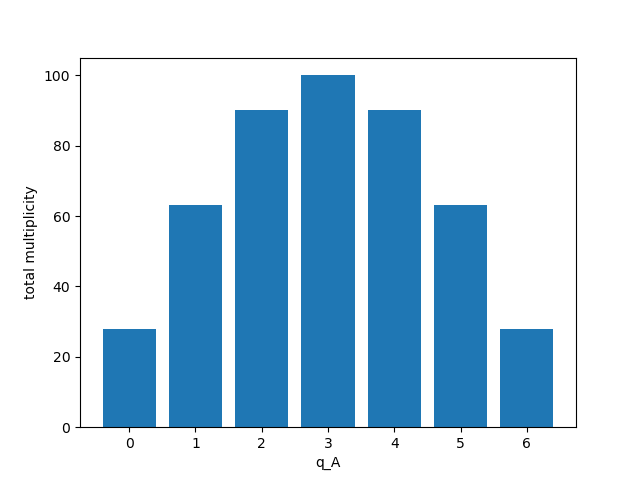

In [7]:
fig0, ax0 = plt.subplots()

ax0.bar(table0['q_A'], table0['mult_total'])
ax0.set_xlabel('q_A')
ax0.set_ylabel('total multiplicity')

In [8]:
table0['mult_total'].sum()

462

In [9]:
multiplicity(6,6)

462

In [10]:
table0.sort_values('mult_total', ascending=False).iloc[0]

q_A             3
q_B             3
mult_A         10
mult_B         10
mult_total    100
Name: 3, dtype: int64

In [11]:
table0['probability'] = table0['mult_total']/table0['mult_total'].sum()

In [12]:
table0

,q_A,q_B,mult_A,mult_B,mult_total,probability
0,0,6,1,28,28,0.060606
1,1,5,3,21,63,0.136364
2,2,4,6,15,90,0.194805
3,3,3,10,10,100,0.216450
4,4,2,15,6,90,0.194805
5,5,1,21,3,63,0.136364
6,6,0,28,1,28,0.060606


In [13]:
def multiTable(N_a, N_b, q):
    table0 = pd.DataFrame()
    table0['q_A'] = range(0,q+1, 1)
    table0['q_B'] = range(q, 0-1, -1)
    table0['mult_A'] = [multiplicity(N_a, i) for i in table0['q_A']]
    table0['mult_B'] = [multiplicity(N_b, i) for i in table0['q_B']]
    table0['mult_total'] = table0['mult_A']*table0['mult_B']
    table0['probability'] = table0['mult_total']/table0['mult_total'].sum()
    return table0

In [14]:
table1 = multiTable(300, 200, 100)

Text(0, 0.5, 'total multiplicity')

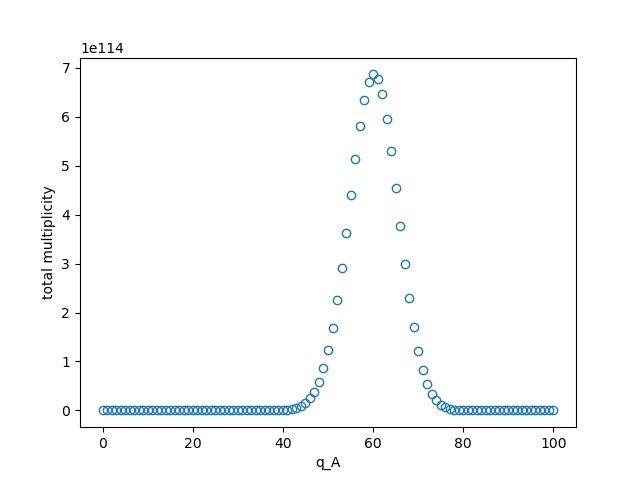

In [15]:
fig1, ax1 = plt.subplots()

ax1.plot(table1['q_A'], table1['mult_total'], 'o', mfc='None')

ax1.set_xlabel('q_A')
ax1.set_ylabel('total multiplicity')

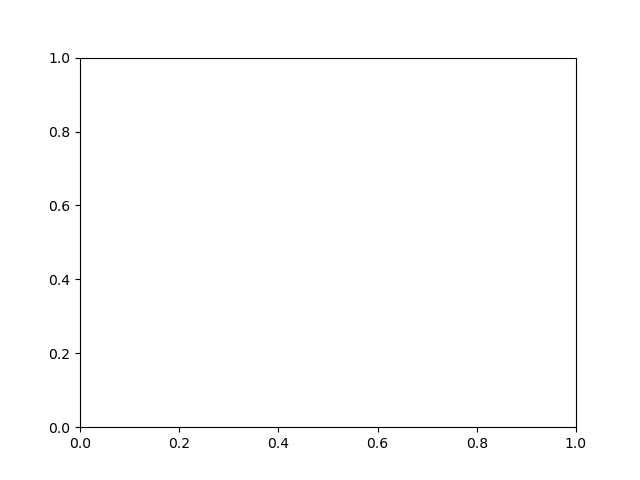

In [16]:
fig2, ax2 = plt.subplots()

